<a href="https://colab.research.google.com/github/LeninGF/yolov8MobileApp/blob/main/yolov8mobileapp/notebooks/yolo_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mobile APP using Yolo Model

* Coders:
    - Lenin Falconí
    - Mario Moreno
    - Jonathan Zea

## Goals

- Obtener un modelo en /TFLITE/ para consumir modelos de Yolo en sistemas móbiles como Android
- Explorar las predicciones con Yolo

In [1]:
import torch

# model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-12-9 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [25]:
categories_names = model.names

In [26]:
import pandas as pd
categories_df = pd.DataFrame(categories_names.items(), columns=['id', 'name'])
categories_df.sample(10)

,id,name
29,29,frisbee
63,63,laptop
60,60,dining table
24,24,backpack
62,62,tv
25,25,umbrella
48,48,sandwich
11,11,stop sign
78,78,hair drier
20,20,elephant


In [27]:
import json
with open('categories.json', 'w') as f:
    json.dump(categories_names, f)

In [2]:
# !pip install torchsummary

In [3]:
# model

In [4]:
# Inference
# import cv2
# img = cv2.imread('.././data/zidane.jpg')
results = model("https://ultralytics.com/images/zidane.jpg")

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [5]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,745.578735,48.470276,1142.694336,720.000000,0.868910,0,person
1,124.744080,197.334503,844.397644,716.650513,0.630325,0,person
2,441.238708,439.350616,498.380737,708.570923,0.616793,27,tie
3,594.081787,377.300354,635.423950,437.147827,0.274014,67,cell phone


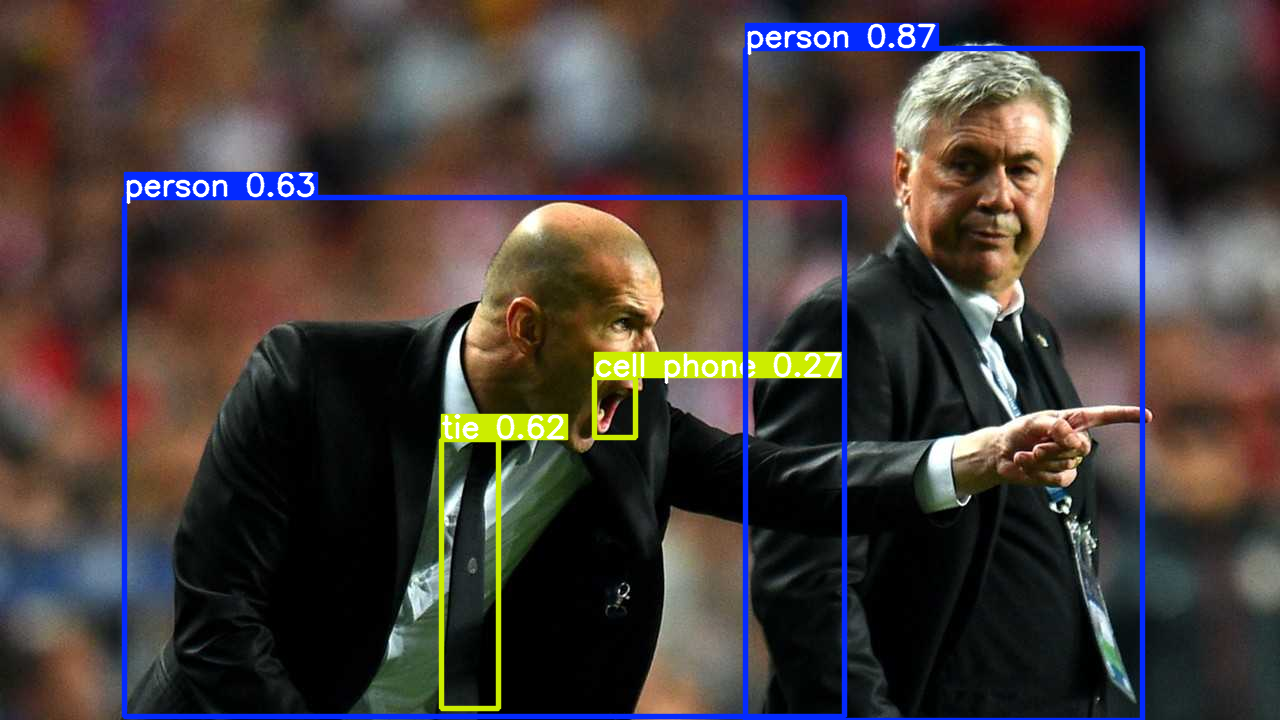

In [6]:
results.show()

## TFLite
Para convertir el modelo a tflite se va a seguir el proceso indicado en

- https://medium.com/@elvenkim1/how-to-convert-yolov5-to-tflite-523925d4704d
- https://docs.ultralytics.com/yolov5/tutorials/model_export/#opencv-dnn-inference



In [7]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [8]:
!pip install -r /content/yolov5/requirements.txt

In [9]:
!pip install tqdm

In [10]:
!pip install IProgress

In [12]:
%cd yolov5

/content/yolov5


In [13]:
torch.cuda.get_arch_list()

['sm_50', 'sm_60', 'sm_70', 'sm_75', 'sm_80', 'sm_86', 'sm_90']

In [17]:
!python benchmarks.py --weights yolov5s.pt --imgsz 640 --device 0

benchmarks: weights=yolov5s.pt, imgsz=640, batch_size=1, data=/content/yolov5/data/coco128.yaml, device=0, half=False, test=False, pt_only=False, hard_fail=False
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 128/128 [00:04<00:00, 31.03it/s]
                   all        128        929      0.669      0.661      0.712      0.472
Speed: 0.3ms pre-process, 12.3ms inference, 6.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/val/exp9
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusi

In [18]:
!python export.py --weights yolov5s.pt --include tflite

export: data=data/coco128.yaml, weights=['yolov5s.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs

PyTorch: starting from yolov5s.pt with output shape (1, 25200, 85) (14.1 MB)
2024-12-09 01:38:59.014115: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733708339.032197   14746 cuda_dnn.cc:8501] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already 

In [19]:
!python detect.py --weights yolov5s-fp16.tflite

detect: weights=['yolov5s-fp16.tflite'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

2024-12-09 01:43:21.587997: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733708601.608563   15896 cuda_dnn.cc:8501] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733708601.614737   15896 

In [20]:
!python val.py --weights yolov5s-fp16.tflite

val: data=data/coco128.yaml, weights=['yolov5s-fp16.tflite'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

2024-12-09 01:44:41.281997: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733708681.302421   16238 cuda_dnn.cc:8501] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733708681.308602   16238 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [49]:
model_tflite = torch.hub.load('ultralytics/yolov5', 'custom', '/content/yolov5/yolov5s-fp16.tflite')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-12-9 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Loading /content/yolov5/yolov5s-fp16.tflite for TensorFlow Lite inference...
Adding AutoShape... 


## Testeo de Modelo TFLITE

Se procede a leer una imagen por defecto y revisar las predicciones realizadas por el modelo

In [44]:
import cv2
import urllib.request
import numpy as np

def url_to_image(url):
  """
  Downloads an image from a URL and converts it to an OpenCV-compatible format.

  Args:
    url: The URL of the image to download.

  Returns:
    A NumPy array representing the image.
  """
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  return image

# Example usage
image_url = 'https://ultralytics.com/images/bus.jpg'
img = url_to_image(image_url)

# Now you can use 'img' with cv2 functions
# Convert the image to RGB (if it's not already)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (640, 640))  # Resize as needed
img.shape

(640, 640, 3)

In [50]:
predict = model_tflite(img)

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


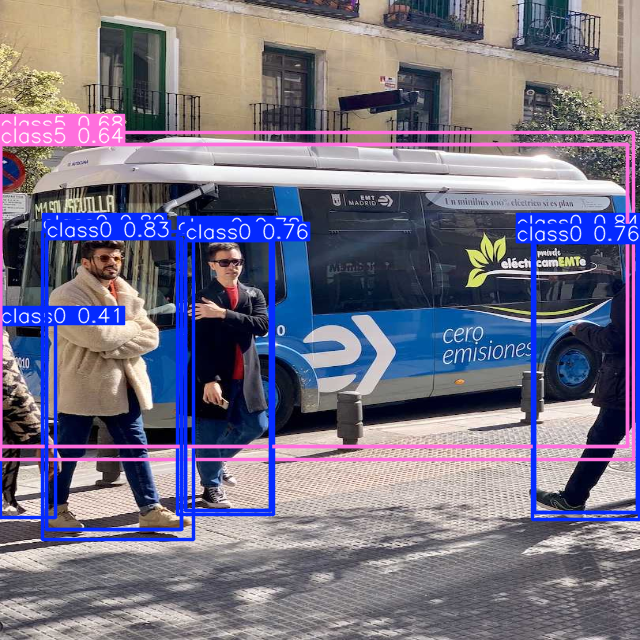

In [52]:
predict.show()